In [62]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

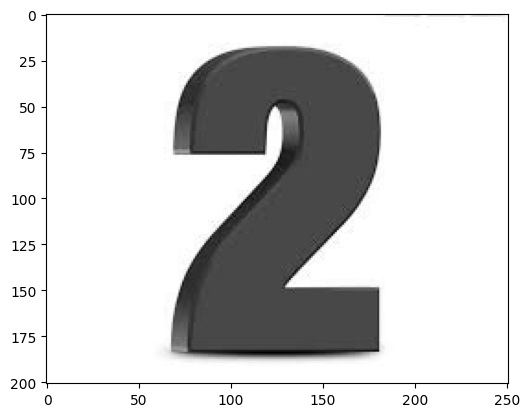

In [63]:
img = cv2.imread('images.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.gray()
#save image
plt.savefig('goc.png')
plt.show()

In [64]:
copy_img = img.copy()
copy_1 = img.copy()
copy_2 = img.copy()
copy_3 = img.copy()

size_x = img.shape[0]
size_y = img.shape[1]



In [65]:
# Experiment with different values and see the effect
# of the kernel on the output image

# 3x3 kernel
filter1 = np.array([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]])

filter2 = [ [-1, -1, -1],
            [0, 0, 0], 
            [1, 1, 1]]

filter3 = [ [1, 0, -1],
            [2, 0, -2],
            [1, 0, -1]]

filter4 = [ [1, 2, 1],
            [0, 0, 0],
            [-1, -2, -1]]

weight = 2

In [66]:
# Iterate over the image
def conv(filter,copy_img):
    for x in range(1,size_x-1):
        for y in range(1,size_y-1):
            conv = 0.0
            conv = conv + (img[x - 1, y-1] * filter[0][0])
            conv = conv + (img[x, y-1] * filter[0][1])
            conv = conv + (img[x + 1, y-1] * filter[0][2])
            conv = conv + (img[x-1, y] * filter[1][0])
            conv = conv + (img[x, y] * filter[1][1])
            conv = conv + (img[x+1, y] * filter[1][2])
            conv = conv + (img[x-1, y+1] * filter[2][0])
            conv = conv + (img[x, y+1] * filter[2][1])
            conv = conv + (img[x+1, y+1] * filter[2][2])
            conv = conv * weight
            if(conv<0):
                conv=0
            if(conv>255):
                conv=255

            copy_img[x, y] = conv
    return copy_img        


In [67]:
img1 = conv(filter1,copy_img)
img2 = conv(filter2,copy_1)
img3 = conv(filter3,copy_2)
img4 = conv(filter4,copy_3)

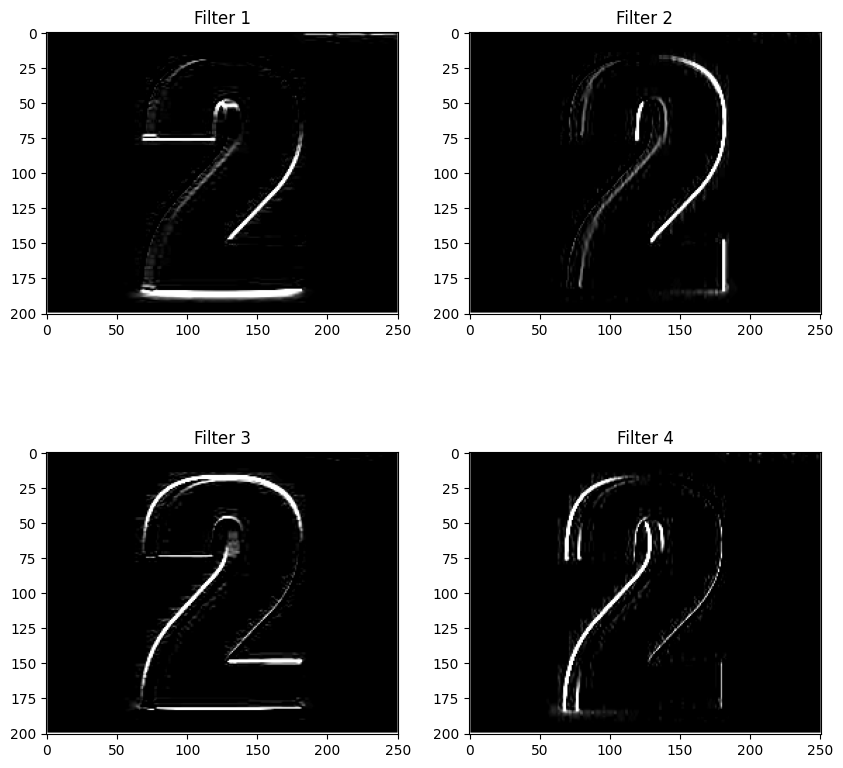

In [68]:
# Plot the images
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
plt.gray()
axs[0, 0].imshow(img1)
axs[0, 0].set_title('Filter 1')
axs[0, 1].imshow(img2)
axs[0, 1].set_title('Filter 2')
axs[1, 0].imshow(img3)
axs[1, 0].set_title('Filter 3')
axs[1, 1].imshow(img4)
axs[1, 1].set_title('Filter 4')

#save image
plt.savefig('conv1.png')

plt.show()

In [69]:
def maxpooling(img,poolsize):
    new_x = int(size_x/poolsize)
    new_y = int(size_y/poolsize)

    new_img = np.zeros((new_x,new_y))

    for x in range(0,size_x-1,poolsize):
        for y in range(0,size_y-1,poolsize):
            pixels = []
            pixels.append(img[x,y])
            pixels.append(img[x+1,y])
            pixels.append(img[x,y+1])
            pixels.append(img[x+1,y+1])

            new_img[int(x/poolsize),int(y/poolsize)] = max(pixels)

    return new_img


In [70]:
img1 = maxpooling(img1,2)
img2 = maxpooling(img2,2)
img3 = maxpooling(img3,2)
img4 = maxpooling(img4,2)


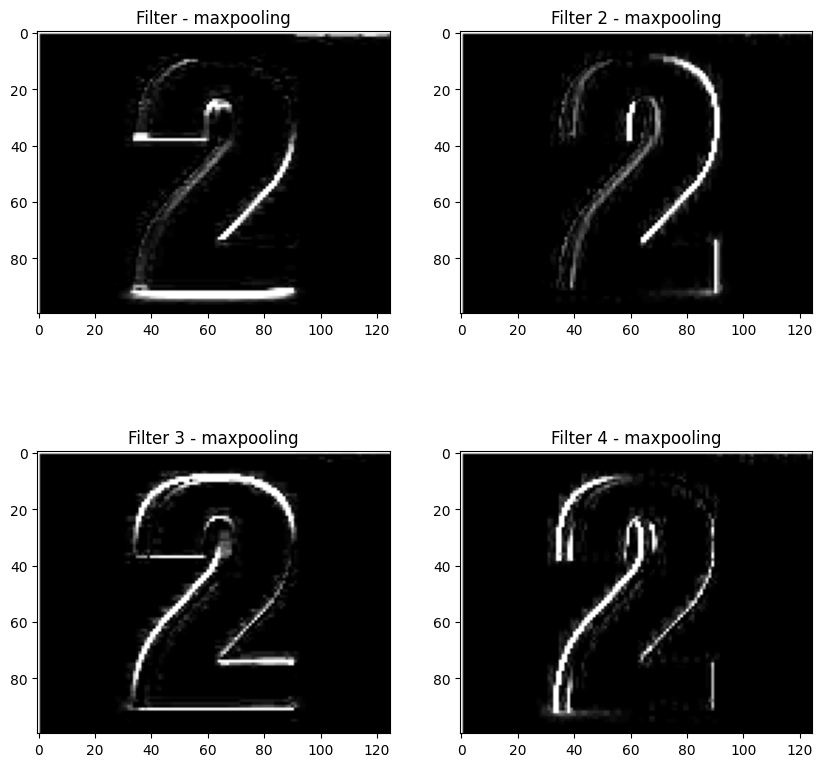

In [71]:
# Plot the images
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
plt.gray()
axs[0, 0].imshow(img1)
axs[0, 0].set_title('Filter - maxpooling')
axs[0, 1].imshow(img2)
axs[0, 1].set_title('Filter 2 - maxpooling')
axs[1, 0].imshow(img3)
axs[1, 0].set_title('Filter 3 - maxpooling')
axs[1, 1].imshow(img4)
axs[1, 1].set_title('Filter 4 - maxpooling')

plt.savefig('maxpooling.png')
plt.show()